In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()

In [2]:
import kaggle
kaggle.api.dataset_download_files('camnugent/california-housing-prices', path = 'data/' , unzip=True)

Dataset URL: https://www.kaggle.com/datasets/camnugent/california-housing-prices


In [3]:
df = pd.read_csv('data/housing.csv')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


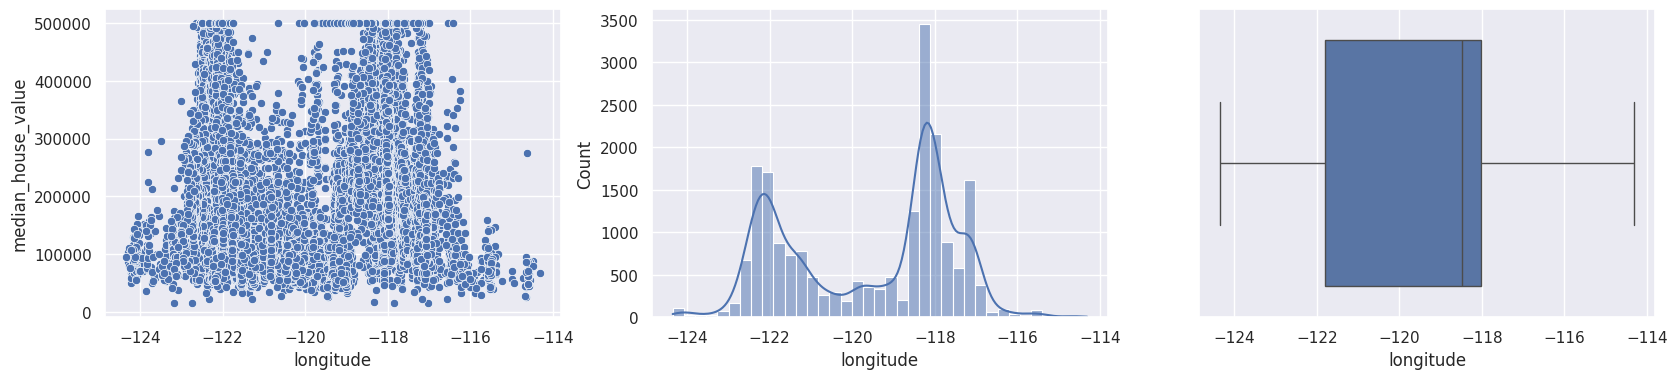

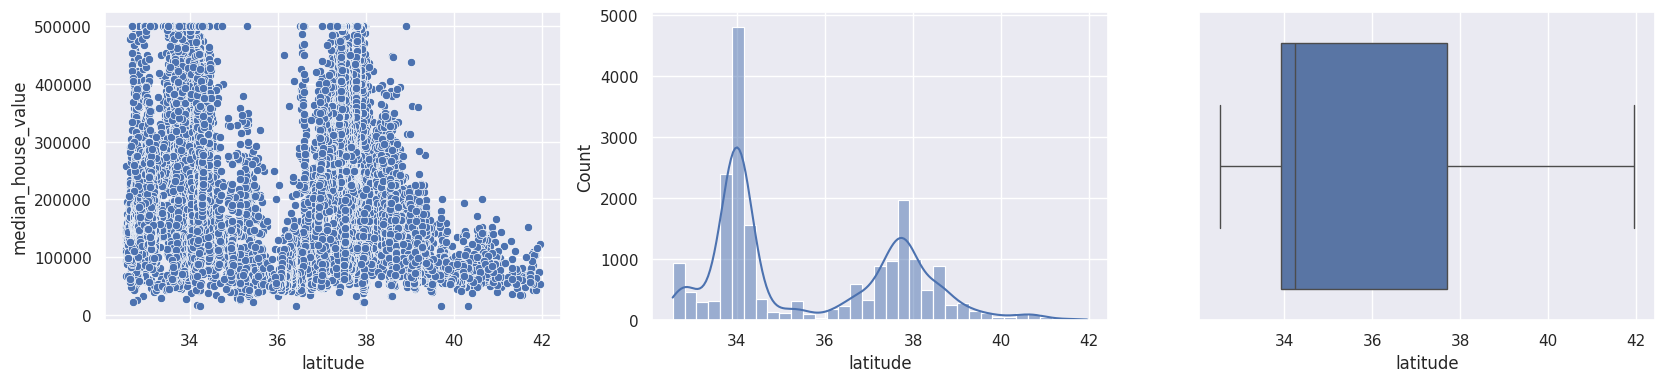

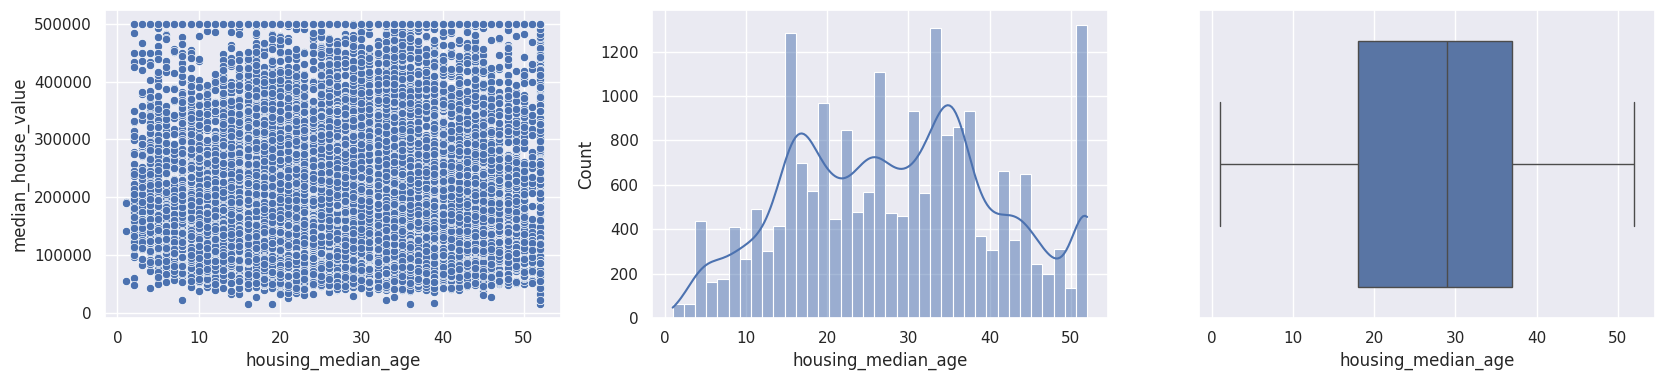

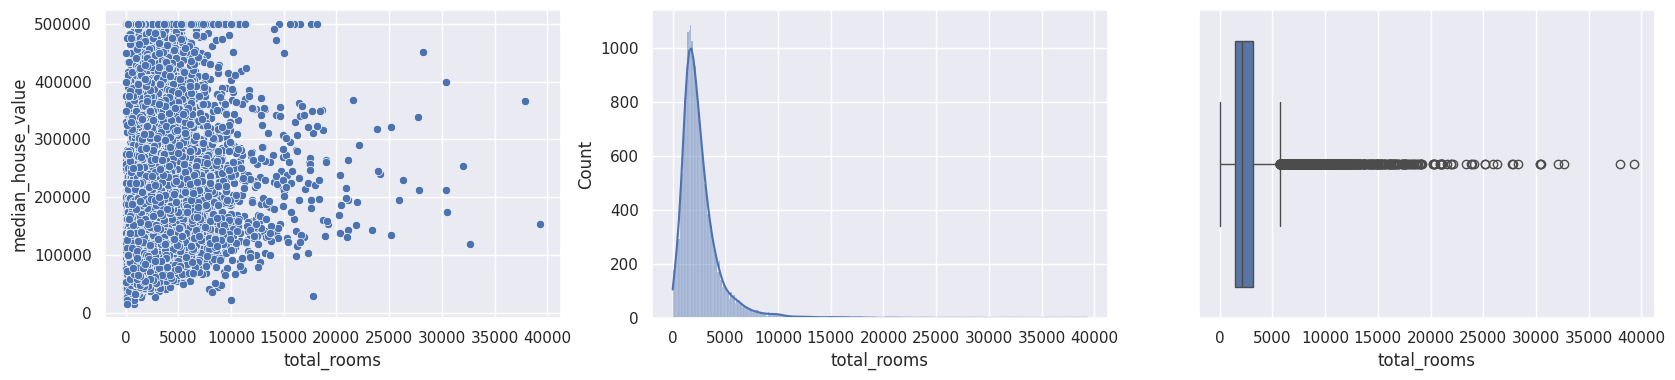

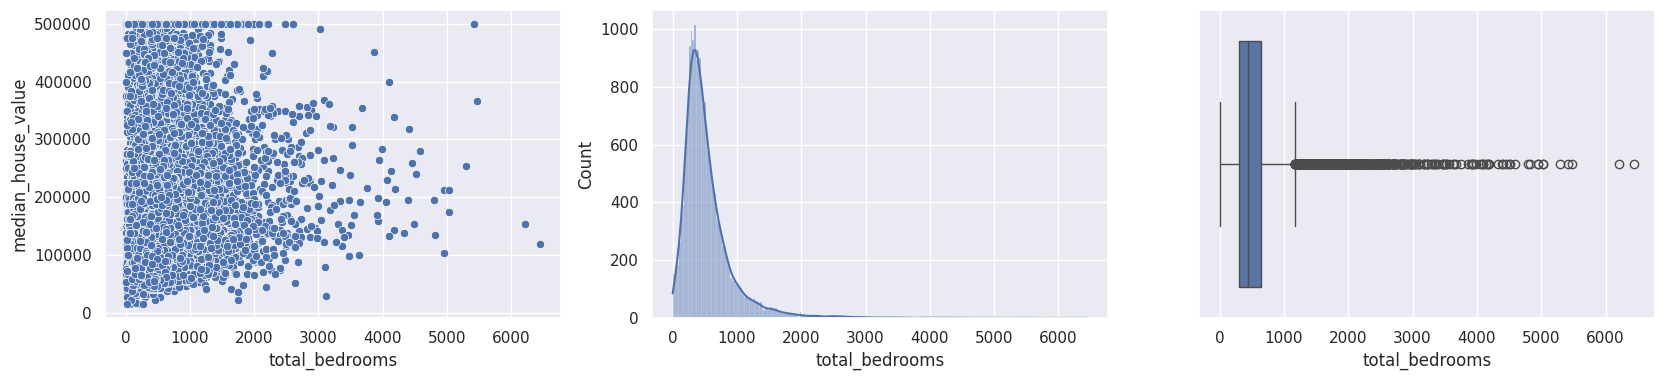

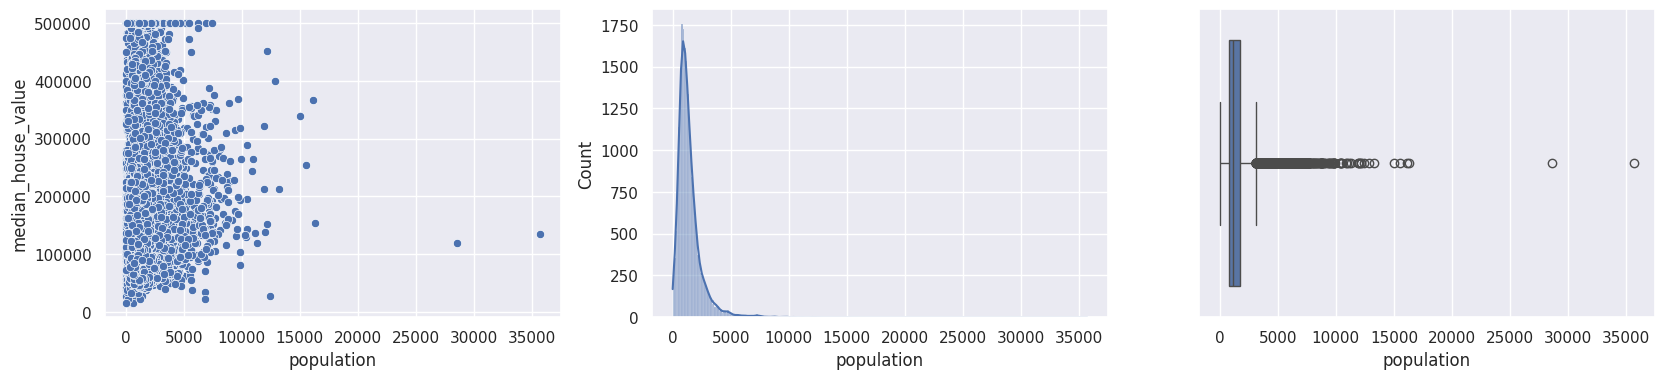

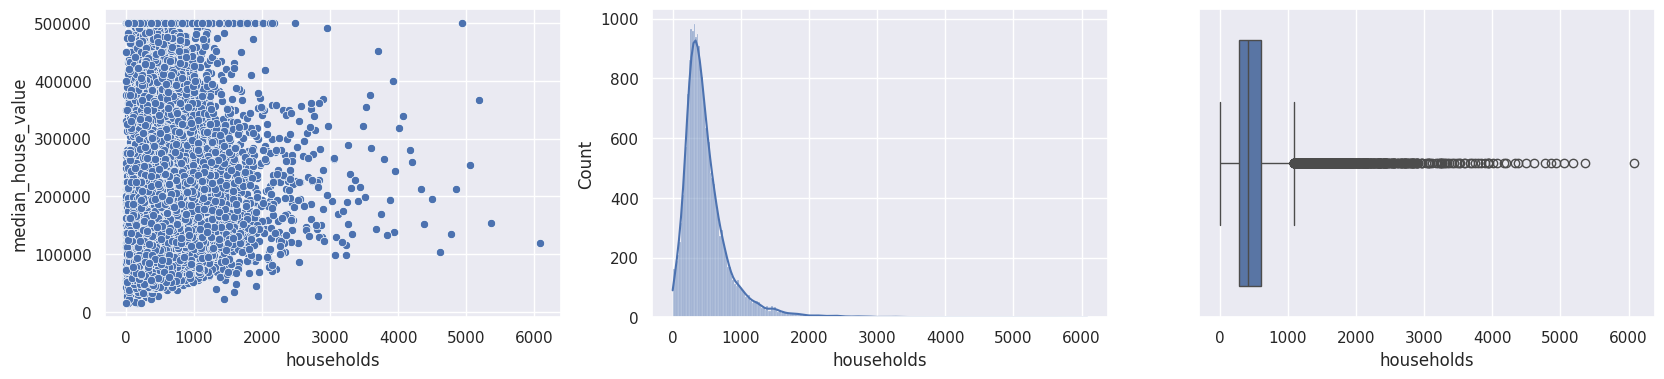

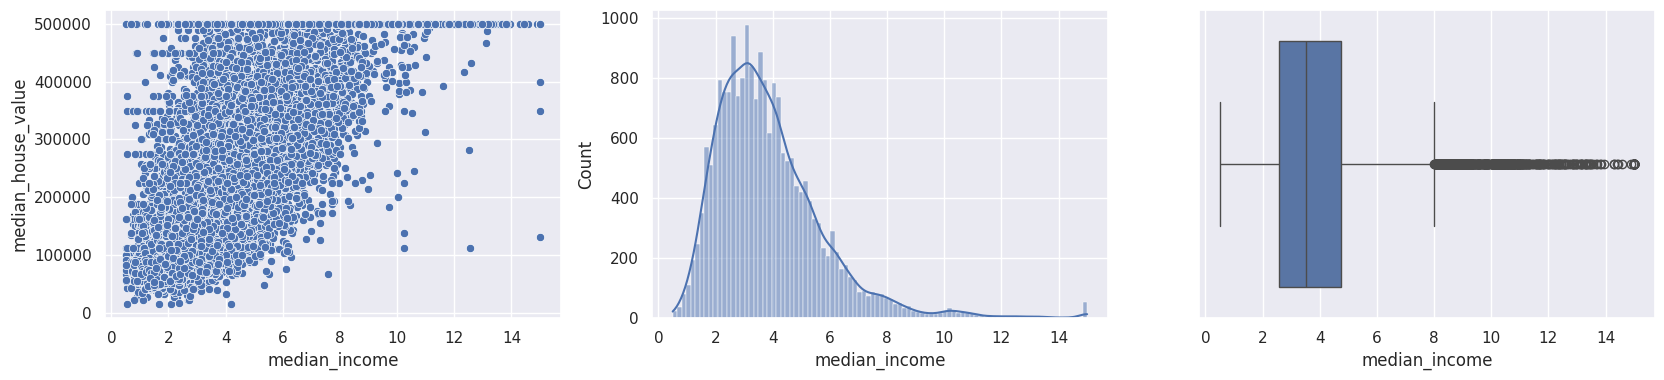

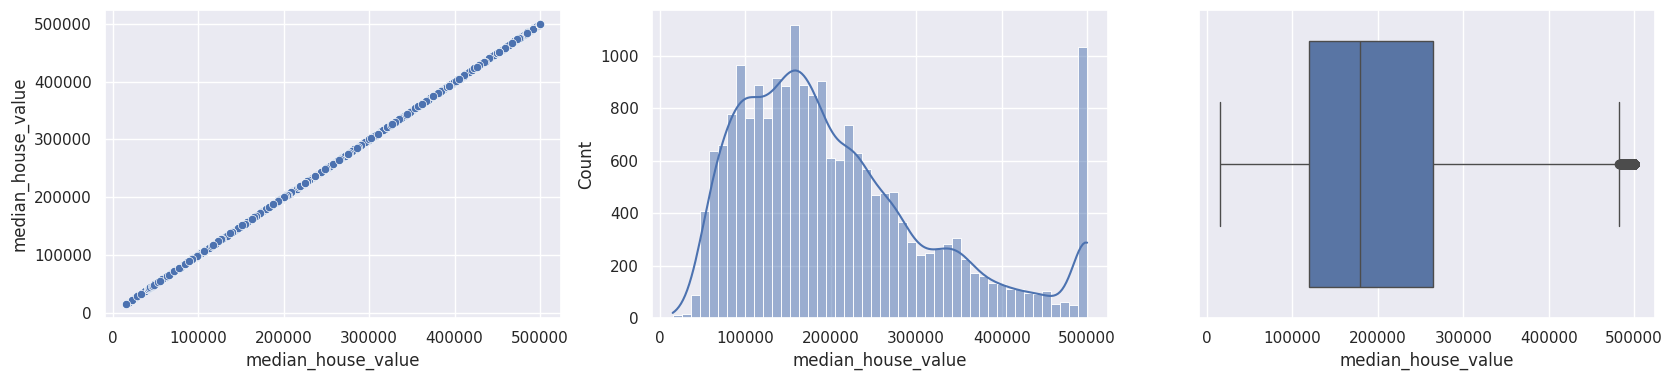

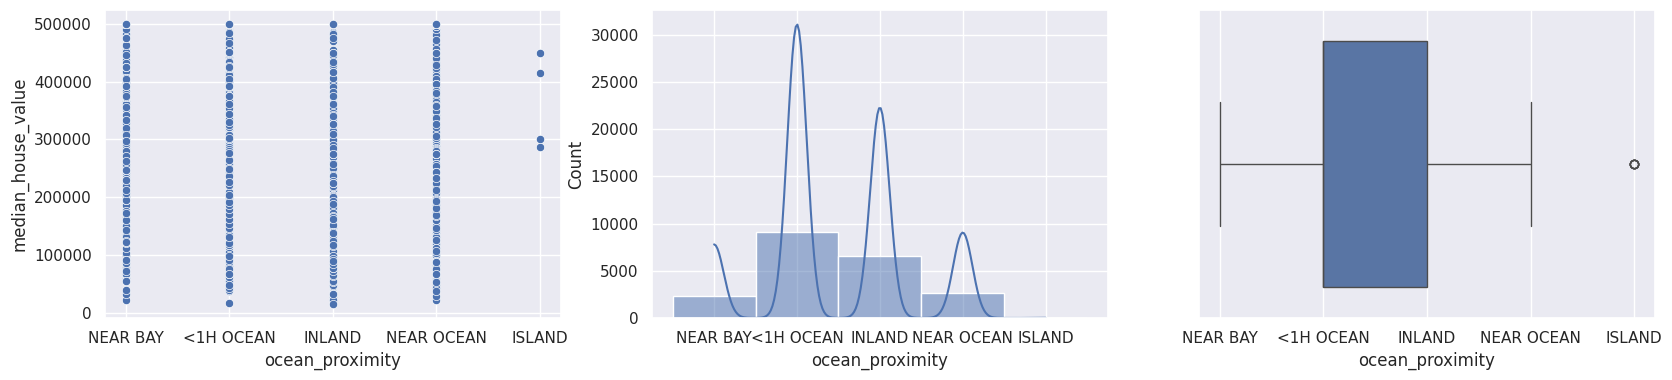

In [7]:
# Analysis
for col in df.columns:
    plt.figure(figsize=(20,4))
    
    plt.subplot(131)
    sns.scatterplot(data = df , x = col , y = 'median_house_value')

    plt.subplot(132)
    sns.histplot(data = df , x = col , kde=True)

    plt.subplot(133)
    sns.boxplot(data = df , x = col)

    plt.show()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

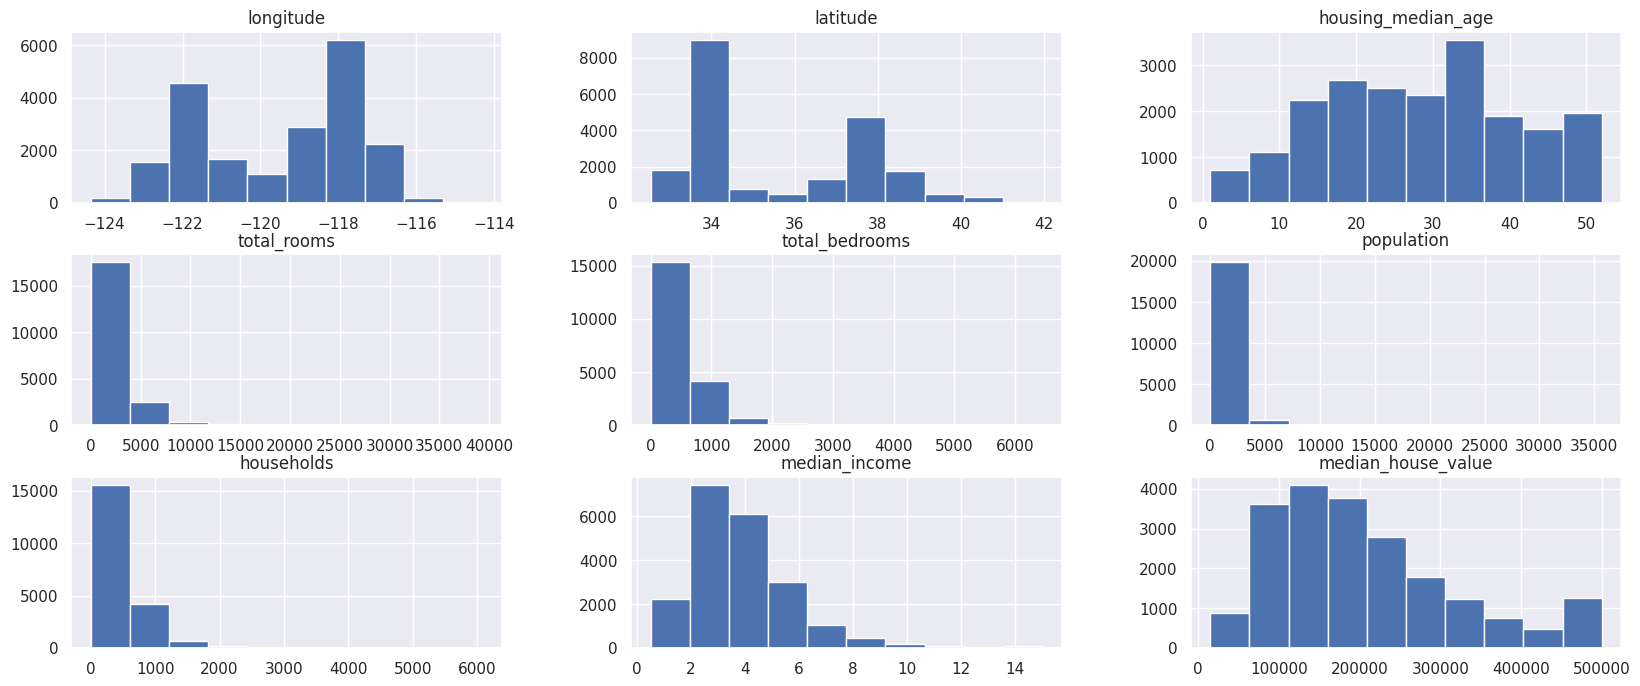

In [8]:
df.hist(figsize=(20,8))

<Axes: >

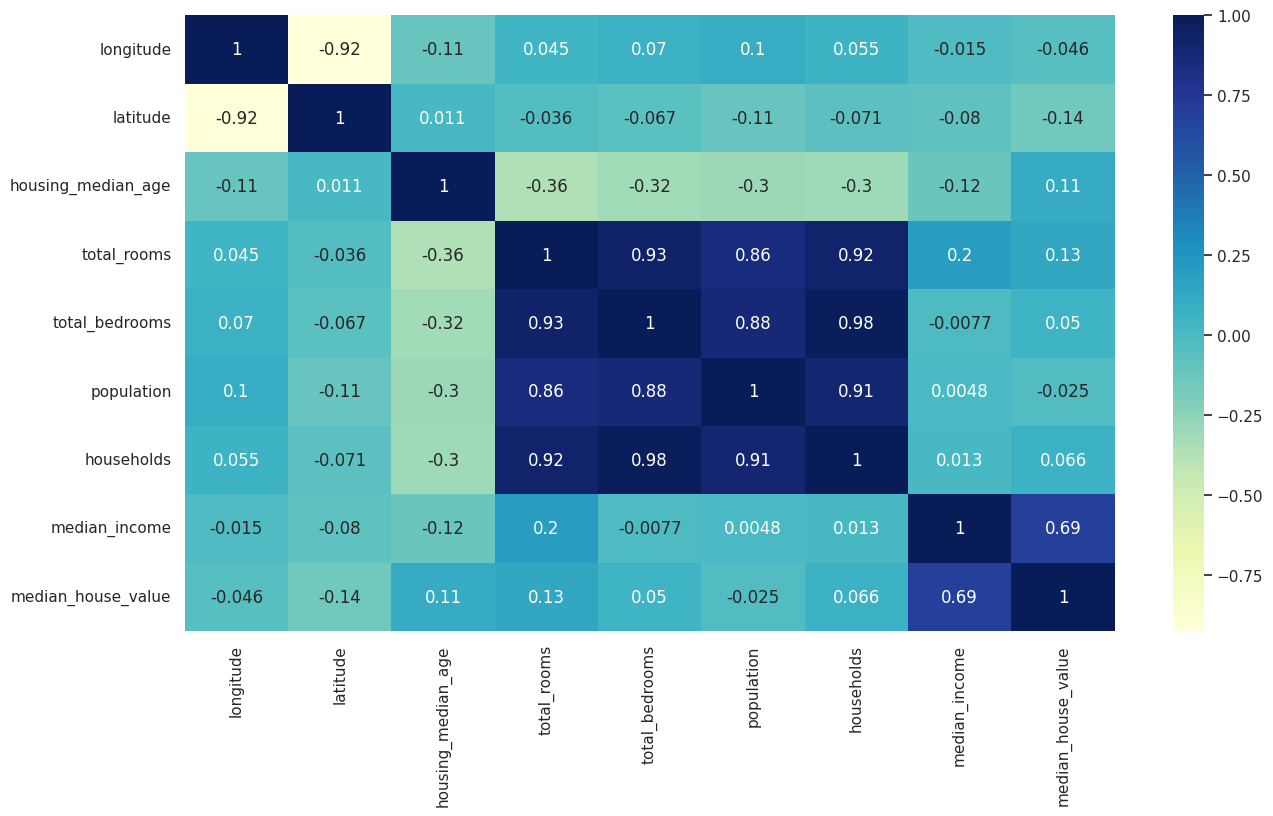

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(numeric_only=True) , annot=True , cmap='YlGnBu')

In [10]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [11]:
# apply log transformations on right skewed columns
cols = ['total_rooms' , 'total_bedrooms' , 'population' , 'households']
df[cols] = np.log1p(df[cols])

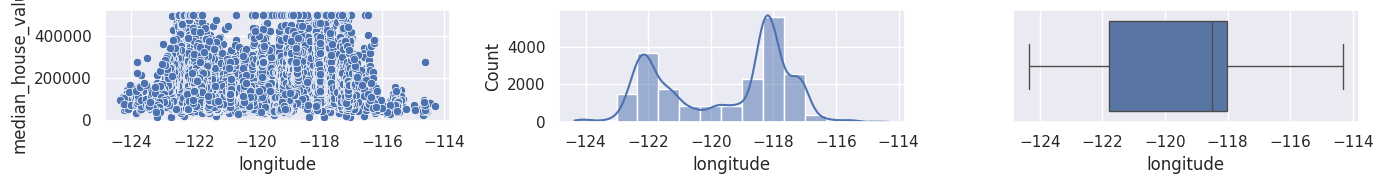

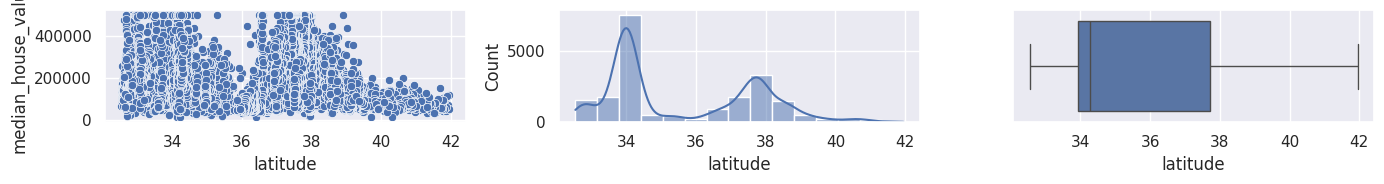

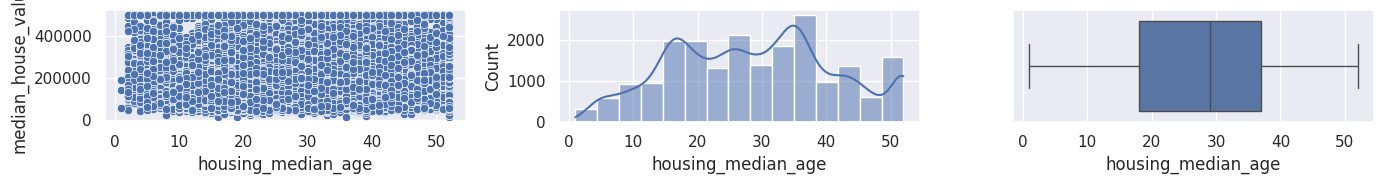

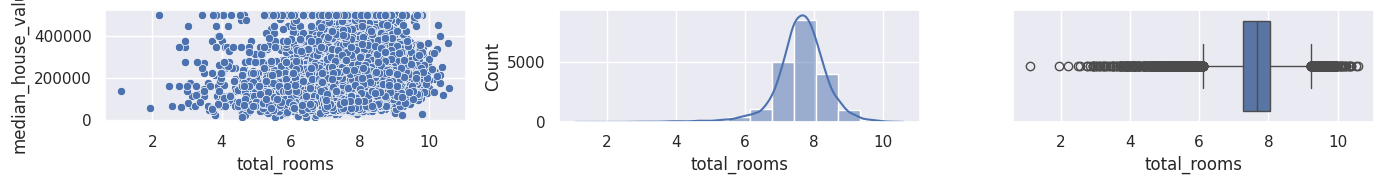

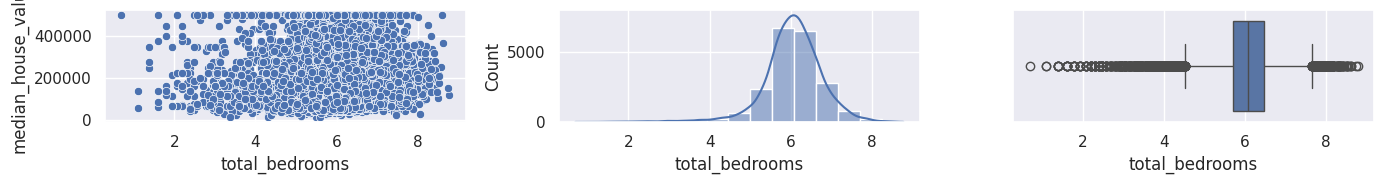

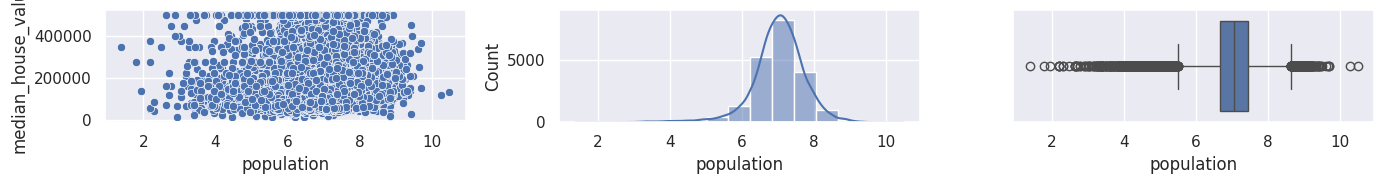

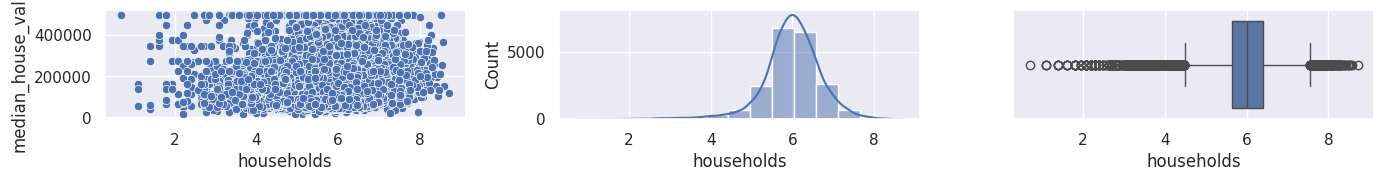

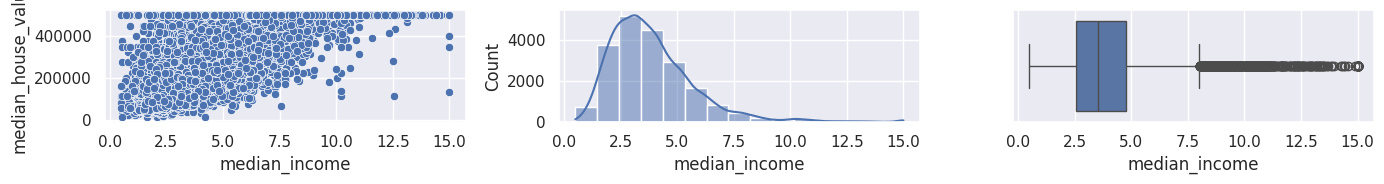

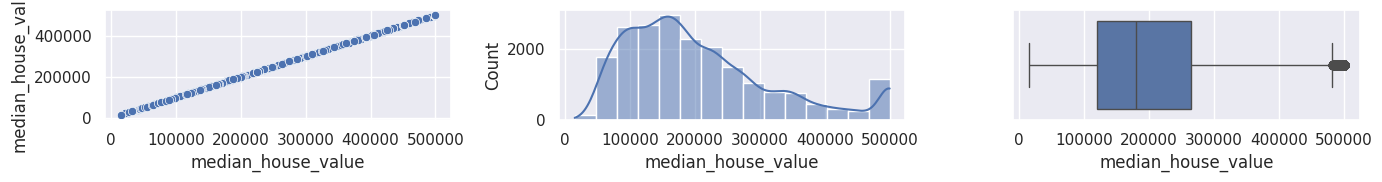

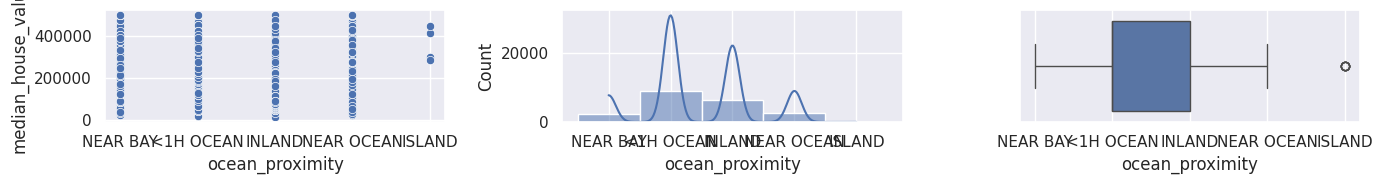

In [12]:
# Analysis
for col in df.columns:
    plt.figure(figsize=(14,2))
    
    plt.subplot(131)
    sns.scatterplot(data = df , x = col , y = 'median_house_value')

    plt.subplot(132)
    sns.histplot(data = df , x = col , kde=True , bins = 15)

    plt.subplot(133)
    sns.boxplot(data = df , x = col)
    plt.tight_layout()
    plt.show()

In [13]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

<Axes: xlabel='ocean_proximity'>

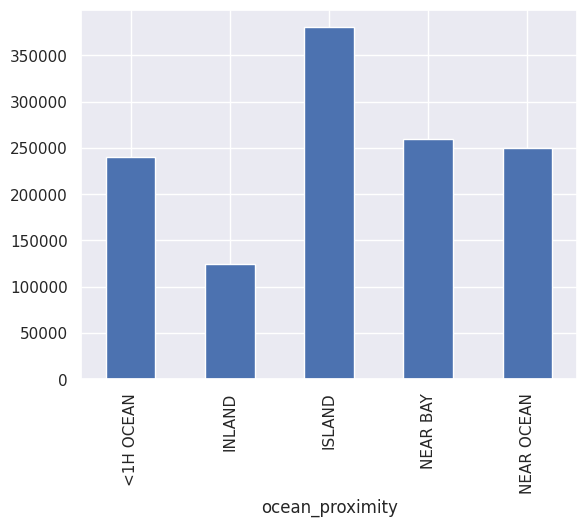

In [14]:
# see how is ocean proximity affecting
df.groupby('ocean_proximity')['median_house_value'].mean().plot.bar()

<Axes: xlabel='latitude', ylabel='longitude'>

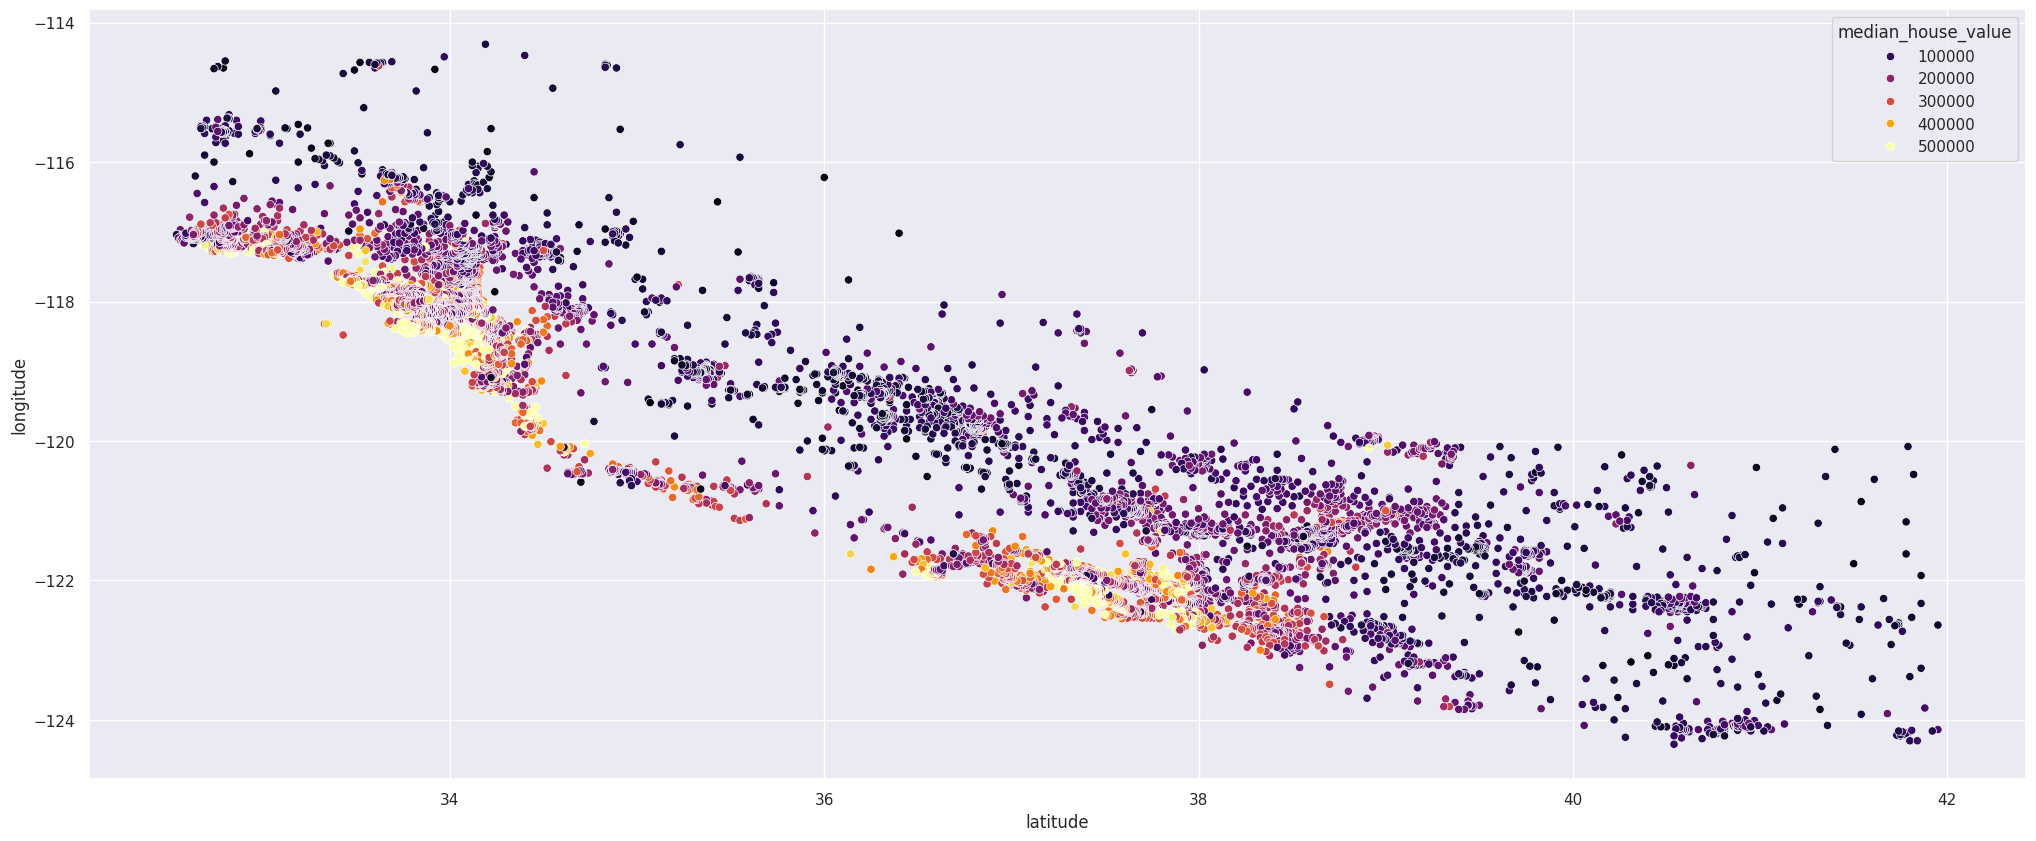

In [15]:
plt.figure(figsize=(25,10))
sns.scatterplot(data = df , x = 'latitude' , y = 'longitude' , hue = 'median_house_value' , palette='inferno')

In [16]:
df = df.join(pd.get_dummies(df['ocean_proximity'] , drop_first= True)).drop('ocean_proximity' , axis = 1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   INLAND              20640 non-null  bool   
 10  ISLAND              20640 non-null  bool   
 11  NEAR BAY            20640 non-null  bool   
 12  NEAR OCEAN          20640 non-null  bool   
dtypes: bool(4), float64(9)
memory usage: 1.5 MB


In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')
df['total_bedrooms'] = imputer.fit_transform(df[['total_bedrooms']])

In [19]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(
    df.drop('median_house_value' , axis = 1),
    df['median_house_value'],
    test_size= 0.2,
    random_state= 42
)

In [20]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14196,-117.03,32.71,33.0,8.047829,6.442540,7.741099,6.436150,3.2596,False,False,False,True
8267,-118.16,33.77,49.0,8.126518,6.669498,7.181592,6.629363,3.8125,False,False,False,True
17445,-120.48,34.66,4.0,7.548556,5.805135,6.820016,5.820083,4.1563,False,False,False,True
14265,-117.11,32.69,36.0,7.259820,5.908083,7.257708,5.874931,1.9425,False,False,False,True
2271,-119.80,36.78,43.0,7.776115,6.068426,6.774224,5.942799,3.5542,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,7.193686,5.308268,6.490724,5.384495,6.3700,False,False,False,False
11964,-117.43,34.02,33.0,8.034307,6.347389,7.469654,6.109248,3.0500,True,False,False,False
5390,-118.38,34.03,36.0,7.650645,6.345636,7.471363,6.269096,2.9344,False,False,False,False
860,-121.96,37.58,15.0,8.182000,6.393591,7.483244,6.327937,5.7192,False,False,False,False


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled , y_train)
lr.score(X_test_scaled , y_test)

0.6329402227471825